# feature engineering 


<h1>Feature Engineering:  </h1>
  <ol> 
    <li> Feature Transformation: </li>
            <ul>
            <li> Missing value imputation </li>
            <li> Handling Categorical features </li>
            <li>  Outlier Detection</li>
            <li> Feature Scaling </li>
                </ul>
    <li> FEATURE Construction</li>
    <li> Feature Selection </li>
    <li> Feature Extraction </li>
    </ol>




<h1> Feature Transformation </h1>
<h3> Missing Values </h3>


 Either fill the missing values or remove the missing values


 <h3> Handling Categorical Values </h3>
 Scikit-learn takes only numerical values so transfom it to numerical values.  One hot encoding is used 



 <h3> Outlier detection </h3>
should be removed for better performance 


<h3> Feature Scaling</h3>
different scale features 
let's say i have age and salary in data then salary is in 1000s and age will be in 10s  so data needs to be scaled for better performance 
in range -1 to 1 



# feature construction: 

Create a complete new data column 

Techniques like grouping , feature splitting , varies according to the data 

# feature selection 


Select only necessary features  i.e most important features 
This improves model performance and reduce model training time 

# Feature Extraction 

from the given features create completely new features , not a feature construction though . 


# Feature Scaling - Standardization 


It is a technique to standardize the independednt features present in the data in a fixed range .  Also called z score normalization 



<h3> Types of feature scaling </h3>

1. Standardization 

2. Normalization 
    1. Min max scaler 
    2. Robust Scaler

In [23]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
data = pd.read_csv("D:\CV practice\dataset\house_pricing.csv")


data.head(10)


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [25]:
data.drop('Id',axis=1)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [26]:
data= data.drop('Id',axis=1)
data

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3592,2,2,3,1938,Downtown,Good,No,266746
3,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...
1995,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1062,5,1,2,1903,Rural,Poor,No,476925
1998,4062,3,1,2,1936,Urban,Excellent,Yes,161119


In [27]:
new = data[['Area', 'Bedrooms', 'Bathrooms','Price']].copy()

new

,Area,Bedrooms,Bathrooms,Price
0,1360,5,4,149919
1,4272,5,4,424998
2,3592,2,2,266746
3,966,4,2,244020
4,4926,1,4,636056
...,...,...,...,...
1995,4994,5,4,295620
1996,3046,5,2,580929
1997,1062,5,1,476925
1998,4062,3,1,161119


In [28]:
from sklearn.model_selection import train_test_split
x = new.drop('Price',axis=1)
y = new['Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)



In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

X_train_scaled= scaler.transform(x_train)
X_test_scaled =  scaler.transform(x_test)

In [30]:
scaler.mean_

array([2.77372188e+03, 3.02125000e+00, 2.54062500e+00])

In [31]:
X_train_scaled =  pd.DataFrame(X_train_scaled, columns=x_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=x_test.columns)


X_train_scaled

,Area,Bedrooms,Bathrooms
0,1.314081,0.685758,1.316088
1,-1.315960,-0.014889,0.414272
2,-1.039194,-0.014889,1.316088
3,-0.088966,-0.715536,0.414272
4,0.393836,-0.715536,1.316088
...,...,...,...
1595,0.545288,1.386405,0.414272
1596,-0.789337,-0.014889,0.414272
1597,-0.991529,-0.715536,0.414272
1598,0.524531,1.386405,1.316088


In [32]:
np.round(X_train_scaled.describe())

,Area,Bedrooms,Bathrooms
count,1600.0,1600.0,1600.0
mean,-0.0,-0.0,0.0
std,1.0,1.0,1.0
min,-2.0,-1.0,-1.0
25%,-1.0,-1.0,-0.0
50%,0.0,-0.0,0.0
75%,1.0,1.0,1.0
max,2.0,1.0,1.0


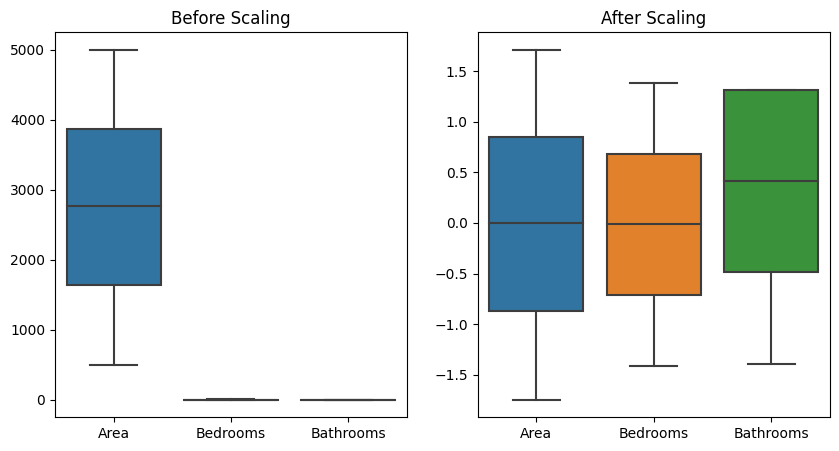

In [33]:
# before scaling vs after scaling plotting

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
sns.boxplot(data=x_train, ax=ax1)
ax1.set_title("Before Scaling")
sns.boxplot(data=X_train_scaled, ax=ax2)
ax2.set_title("After Scaling")
plt.show()


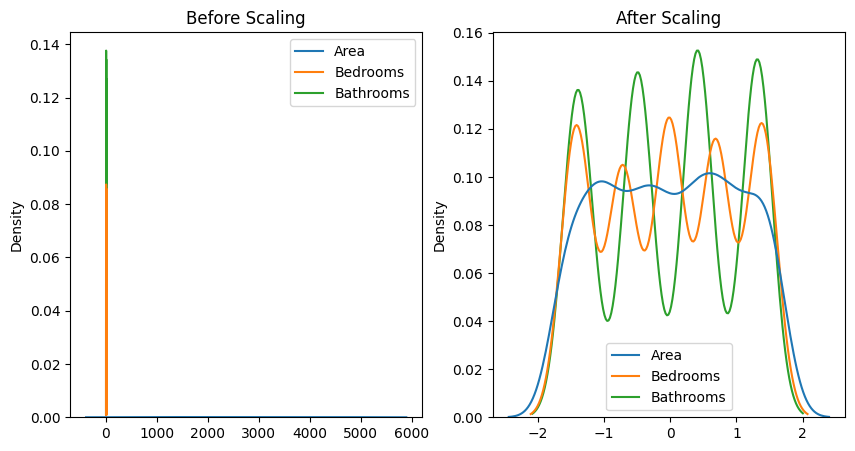

In [34]:
# probability density function 

fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(10,5))
sns.kdeplot(data=x_train, ax=ax3)
ax3.set_title("Before Scaling")
sns.kdeplot(data=X_train_scaled, ax=ax4)
ax4.set_title("After Scaling")
plt.show()





In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
lr = LinearRegression()

lr_scaled = LinearRegression()

In [48]:
lr.fit(x_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [54]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

r2_scaled = r2_score(y_test, y_pred_scaled)


print("Before Scaling:")
print(f"R² Score: {r2:.4f}")
print("\nAfter Scaling:")
print(f"R² Score: {r2_scaled:.4f}")

Before Scaling:
R² Score: -0.0082

After Scaling:
R² Score: -0.0082


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
r2_scaled = r2_score(y_test, y_pred_scaled)

mae = mean_absolute_error(y_test, y_pred)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))

print("Before Scaling:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

print("\nAfter Scaling:")
print(f"R² Score: {r2_scaled:.4f}")
print(f"MAE: {mae_scaled:.2f}")
print(f"RMSE: {rmse_scaled:.2f}")

# Check data quality
print("\n--- Data Check ---")
print(f"Training set size: {len(x_train)}")
print(f"Test set size: {len(x_test)}")
print(f"y_test range: {y_test.min():.2f} to {y_test.max():.2f}")
print(f"y_pred range: {y_pred.min():.2f} to {y_pred.max():.2f}")

Before Scaling:
R² Score: -0.0082
MAE: 243756.48
RMSE: 280072.40

After Scaling:
R² Score: -0.0082
MAE: 243756.48
RMSE: 280072.40

--- Data Check ---
Training set size: 1600
Test set size: 400
y_test range: 51082.00 to 999656.00
y_pred range: 521730.38 to 551463.32


In [57]:
new.describe()

,Area,Bedrooms,Bathrooms,Price
count,2000.000000,2000.000000,2000.00000,2000.000000
mean,2786.209500,3.003500,2.55250,537676.855000
std,1295.146799,1.424606,1.10899,276428.845719
min,501.000000,1.000000,1.00000,50005.000000
25%,1653.000000,2.000000,2.00000,300098.000000
50%,2833.000000,3.000000,3.00000,539254.000000
75%,3887.500000,4.000000,4.00000,780086.000000
max,4999.000000,5.000000,4.00000,999656.000000
